#### Which Machine Learning Models Are Sensitive to Outliers?
- __Naivye Bayes Classifier__ -- Not Sensitive
- __SVM__ ---------------------- Not Sensitive
- __Linear Regression__ -------- Sensitive
- __Logistic Regression__ ------ Sensitive
- __Decision Tree Regressor or Classifier__ ---- Not Sensitive
- __Ensemble (RF, XGboost, GB)__ -- Not Sensitive
- __KNN__ ---------------------- Not Sensitive
- __Kmeans__ ------------------- Sensitive
- __Hierarichal__ -------------- Sensitive
- __PCA__ ---------------------- Sensitive
- __Neural Networks__ ---------- Sensitive

In [3]:
%load_ext nb_black
import sys

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import pandas as pd

pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from data_visualisation.plot import Plot
from utils.utils import read_csv_in_pd
from utils.utils import get_or_drop_na_cols
from utils.utils import replace_categorical_nan_cols
from utils.utils import replace_numerical_nan_cols
from utils.utils import convert_categorical_to_one_hot_encoding
from utils.utils import get_cols_with_nan_values

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [4]:
df = read_csv_in_pd("titanic_dataset", "train.csv")

<IPython.core.display.Javascript object>

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [6]:
df["Age"].isnull().sum()

177

<IPython.core.display.Javascript object>

In [7]:
import seaborn as sns

<IPython.core.display.Javascript object>

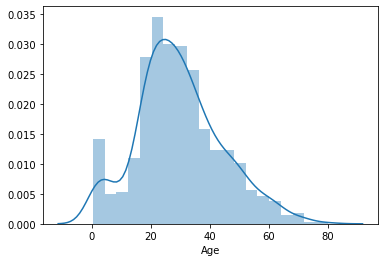

<IPython.core.display.Javascript object>

In [10]:
sns.distplot(df["Age"].dropna())

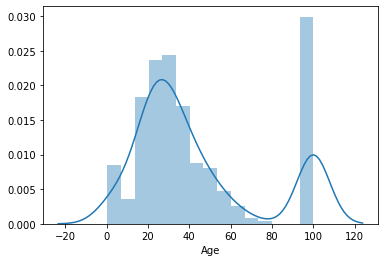

<IPython.core.display.Javascript object>

In [11]:
sns.distplot(df["Age"].fillna(100))

Text(0, 0.5, 'No of Passenger')

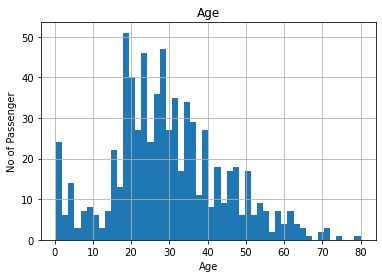

<IPython.core.display.Javascript object>

In [12]:
fig = df.Age.hist(bins=50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("No of Passenger")

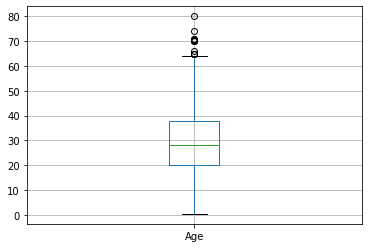

<IPython.core.display.Javascript object>

In [14]:
fig = df.boxplot(column="Age")

In [15]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

#### Assuming Age Follows a gaussian distribution we will calculate the boundaries which differentiate the outliers

In [21]:
upper = df["Age"].mean() + 3 * df["Age"].std()
lower = df["Age"].mean() - 3 * df["Age"].std()

<IPython.core.display.Javascript object>

#### If Feature is skewed then we use the below approach

Text(0, 0.5, 'No of Passenger')

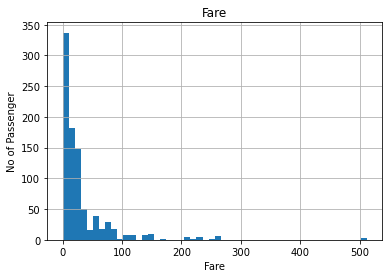

<IPython.core.display.Javascript object>

In [25]:
fig = df.Fare.hist(bins=50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("No of Passenger")

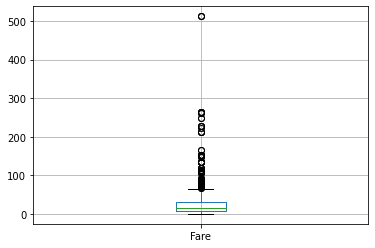

<IPython.core.display.Javascript object>

In [26]:
fig = df.boxplot(column="Fare")

In [27]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [28]:
lower_bridge = df["Fare"].quantile(0.25) - (IQR * 1.5)
upper_bridge = df["Fare"].quantile(0.75) + (IQR * 1.5)

<IPython.core.display.Javascript object>

In [29]:
# Extreme Outliers
lower_bridge = df["Fare"].quantile(0.25) - (IQR * 3)
upper_bridge = df["Fare"].quantile(0.75) + (IQR * 3)

<IPython.core.display.Javascript object>